In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import matplotlib.animation as animation

from datetime import datetime
from IPython.display import HTML

plt.rcParams['animation.embed_limit'] = 2**64
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显正负号
plt.rc('axes', axisbelow=True)

In [2]:
df = pd.read_csv('data.csv', index_col=0)
df.index = [datetime.strptime(d, '%d/%m/%Y').date() for d in df.index]
df = df.iloc[::-1]
df.head(3).append(df.tail(3))

,China,US
2006-01-04,1180.96,1250.56
2006-01-05,1197.27,1239.20
2006-01-06,1209.42,1246.00
2020-04-08,2815.37,2659.41
2020-04-09,2825.90,2749.98
2020-04-10,2796.63,2789.82


In [3]:
df1 = df.iloc[-1000:,:]
df1.head(3).append(df1.tail(3))

,China,US
2016-03-07,2897.34,2091.48
2016-03-08,2901.39,2091.58
2016-03-09,2862.56,2087.79
2020-04-08,2815.37,2659.41
2020-04-09,2825.90,2749.98
2020-04-10,2796.63,2789.82


In [4]:
df1 = df1 / df1.iloc[0,:]*100 - 100
df1.head(3).append(df1.tail(3))

,China,US
2016-03-07,0.000000,0.000000
2016-03-08,0.139783,0.004781
2016-03-09,-1.200411,-0.176430
2020-04-08,-2.829147,27.154455
2020-04-09,-2.465710,31.484882
2020-04-10,-3.475947,33.389753


In [ ]:
def animate( num_of_date ):
    num_of_span = 150
    ax.clear()
    if num_of_date < num_of_span:
        df_temp = df1.iloc[0:num_of_date,:]
        df_span = df1.iloc[0:num_of_span,:]
        idx = df_temp.index
        
        plt.plot( idx, df_temp['China'], 
                  color='#dc2624', linewidth=4, zorder=2 )
        plt.scatter( idx[-1], df_temp['China'][-1], 
                     color='white', s=1000, edgecolor ='#dc2624', linewidth=2, zorder=3 )
        plt.text( idx[-1], df_temp['China'][-1], 
                  s='中国', size=12, ha='center', va='top' )
        
        plt.plot( idx, df_temp['US'], 
                  color='#2b4750', linewidth=4, zorder=2 )
        plt.scatter( idx[-1], df_temp['US'][-1], 
                     color='white', s=1000, edgecolor ='#2b4750', linewidth=2, zorder=3 )
        plt.text( idx[-1], df_temp['US'][-1],
                  s='美国',size=12, ha='center', va='top' )
        
        plt.ylim( -15, df_span.values.max()*1.2 )
        plt.xlim( df_span.index[0], df_span.index[-1] )
        plt.xticks( ticks=df_span.index[0:num_of_span+1:30],
                    labels=df_span.index.values[0:num_of_span+1:30],
                    rotation=90,
                    fontsize=9 )
    else:
        df_temp = df1.iloc[num_of_date-num_of_span:num_of_date,:]
        idx = df_temp.index
        
        plt.plot( idx[:-1], df_temp['China'][:-1],
                  color='#dc2624', linewidth=4, zorder=2 )
        plt.scatter( idx[-1], df_temp['China'][-1], 
                     color='white', s=1000, edgecolor ='#dc2624', linewidth=2, zorder=3 )
        plt.text( idx[-1], df_temp['China'][-1],
                  s='中国', size=12, ha='center', va='top' )
        
        plt.plot( idx[:-1], df_temp['US'][:-1],
                  color='#2b4750', linewidth=4, zorder=2 )
        plt.scatter( idx[-1], df_temp['US'][-1],
                     color='white', s=1000, edgecolor ='#2b4750', linewidth=2, zorder=3 )
        plt.text( idx[-1], df_temp['US'][-1],
                  s='美国', size=12, ha='center', va='top' )
                 
        plt.ylim( -15, df_temp.values.max()*1.2 )
        plt.xlim( df_temp.index[0], df_temp.index[-1] )
        plt.xticks( ticks=df_temp.index[0:num_of_span+1:30],
                    labels=df_temp.index[0:num_of_span+1:30],
                    rotation=90,
                    fontsize=9 )    

    plt.margins(x=0.2)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    plt.grid( axis='y', c='#c7cccf', linewidth=1.5 )
    plt.ylabel('指数累积收益 (%)')
    plt.title('中美股市 2016-2020 年走势对比')

In [ ]:
fig = plt.figure(figsize=(16,8), dpi=100)
ax = fig.gca()
animator = animation.FuncAnimation( fig, 
                                    animate,
                                    frames=np.arange(1,df1.shape[0],1),
                                    interval=200)
HTML(animator.to_jshtml())

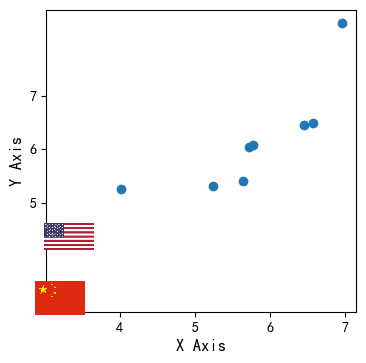

In [3]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

def getImage(path, zoom=0.07):
    img = Image.open(path)
    img.thumbnail((512, 512), Image.ANTIALIAS) # resizes image in-place
    return OffsetImage(img,zoom=zoom)

paths = ['China', 'US']

N=10
x = np.sort(np.random.randn(N))+5
y = np.sort(np.random.randn(N))+5
 
fig, ax = plt.subplots(figsize=(4,4),dpi =100)
ax.scatter(x, y) 

plt.xlabel("X Axis",fontsize=12)
plt.ylabel("Y Axis",fontsize=12)
plt.yticks(ticks=np.arange(5,8,1))

artists = []
for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox( getImage(os.getcwd()+'\\'+path+'.jpg'), (x0, y0), frameon=False )
    artists.append(ax.add_artist(ab))